# Looking at different distributions in the dataset

In [1]:
# Import
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import datetime, os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
pd.options.display.max_columns = 50

print("Last updated on {}".format(datetime.datetime.now().ctime()))

Last updated on Tue Jul 25 18:58:47 2023


In [2]:
# Import Data
df = pd.read_pickle("Shiplog Data/logentries-export-2023-06-08-clean_tier1.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71581 entries, 0 to 71592
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DateTime             71577 non-null  object        
 1   ID                   71581 non-null  int64         
 2   LogBook ID           71550 non-null  object        
 3   Direction            1 non-null      object        
 4   Page                 47538 non-null  float64       
 5   Latitude             56452 non-null  float64       
 6   Longitude            49140 non-null  float64       
 7   Depth                1608 non-null   float64       
 8   Depth Unit           17763 non-null  object        
 9   Bottom               56 non-null     object        
 10  Landmark             11484 non-null  object        
 11  Ship Heading/Course  40950 non-null  object        
 12  Wind Direction       50992 non-null  object        
 13  Wind Speed/Force     61086 non-

### How many Entries (overall) are 'usable', i.e. exhibit Lat./Lon. and Wind Speed values?

In [3]:
df['usable'] = (df["Latitude"].notna() & df["Longitude"].notna() & df["Wind Speed/Force"].notna())
df_u = df[df['usable']==True]
df_u

,DateTime,ID,LogBook ID,Direction,Page,Latitude,Longitude,Depth,Depth Unit,Bottom,Landmark,Ship Heading/Course,Wind Direction,Wind Speed/Force,Sea State,Weather,Cloud Cover,Entry Date Time,coord_diff,usable,usable_latlon,usable_lat
19,1852-07-21 12:00:00,73662,Fortune (Bark) 1850-1854,NaN,NaN,63.900000,-171.000000,NaN,NaN,NaN,"Cape in sight, bearing WNW, distance 30 miles",N by W,NE,2.0,NaN,NaN,clear,1852-07-21 12:00:00,False,True,True,True
21,1852-07-20 12:00:00,73660,Fortune (Bark) 1850-1854,NaN,NaN,63.733333,-171.500000,NaN,NaN,NaN,NaN,In for Land,SSW,6.0,NaN,NaN,clear,1852-07-20 12:00:00,False,True,True,True
24,1852-07-19 12:00:00,73657,Fortune (Bark) 1850-1854,NaN,NaN,64.366667,-174.366667,NaN,NaN,NaN,"Land in sight, bearing NNE, distance 20 miles",N / In for Land,SSW,2.0,NaN,NaN,clear,1852-07-19 12:00:00,False,True,True,True
27,1852-07-18 12:00:00,73654,Fortune (Bark) 1850-1854,NaN,NaN,64.866667,-176.566667,NaN,NaN,NaN,"Land in sight, distance 30 miles\r Cape Bering...",NNW,SSW,6.0,NaN,NaN,NaN,1852-07-18 12:00:00,False,True,True,True
30,1878-05-26 12:00:00,73651,Bertha (Bark) 1878-1881,NaN,39.0,30.116667,-54.100000,NaN,NaN,NaN,NaN,N,W,4.5,NaN,NaN,NaN,1878-05-26 12:00:00,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71588,1855-11-06 12:00:00,520,Alpha (ship) 1855-1859,NaN,26.0,-40.116667,39.033333,NaN,Fathoms,NaN,NaN,SE by E,N NW,8.0,NaN,squally,NaN,1855-11-06 12:00:00,False,True,True,True
71589,1855-11-05 12:00:00,519,Alpha (ship) 1855-1859,NaN,26.0,-39.983333,28.150000,NaN,Fathoms,NaN,NaN,"""Middle moderate""",N NW,6.0,NaN,NaN,NaN,1855-11-05 12:00:00,True,True,True,True
71590,1855-11-04 12:00:00,518,Alpha (ship) 1855-1859,NaN,26.0,-40.383333,23.616667,NaN,Fathoms,NaN,NaN,SE by E,N NW,6.0,NaN,NaN,NaN,1855-11-04 12:00:00,False,True,True,True
71591,1855-11-03 12:00:00,517,Alpha (ship) 1855-1859,NaN,26.0,-40.083333,19.716667,NaN,Fathoms,NaN,NaN,SE by S,W by S,6.0,NaN,NaN,NaN,1855-11-03 12:00:00,False,True,True,True


### Histogram of Beaufort Scale values

Number of entries covered by the mapping so far:  42828


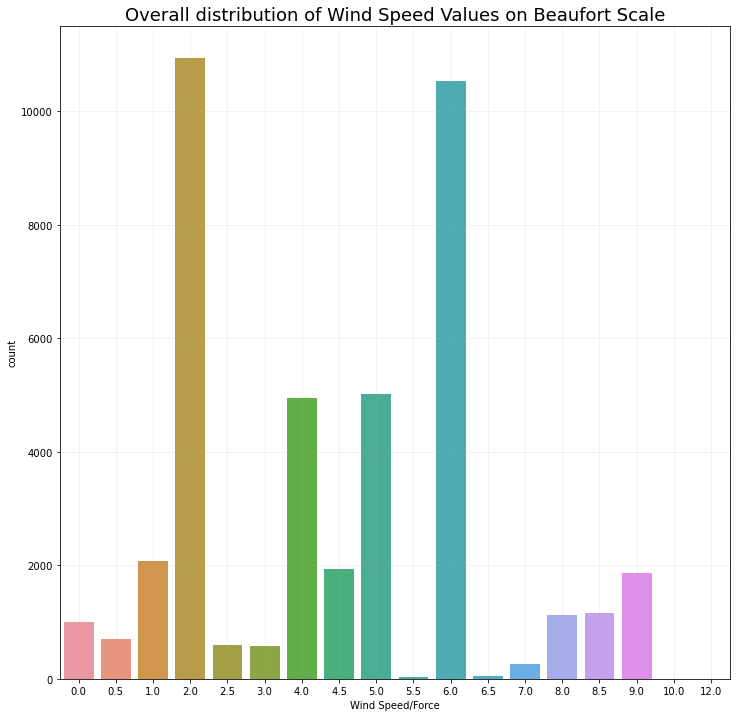

In [5]:
print('Number of entries covered by the mapping so far: ',np.size(df_u['Wind Speed/Force']))

f, ax = plt.subplots(figsize = (12,12))
sns.countplot(x=df_u["Wind Speed/Force"])
ax.grid(alpha=0.2)
plt.title('Overall distribution of Wind Speed Values on Beaufort Scale',fontsize=18)
plt.savefig('Distribution_Beaufort Scale_V6_Jun23.png',dpi=300,bbox_inches='tight')

### Entries per Logbook

Unique Log Books:  123


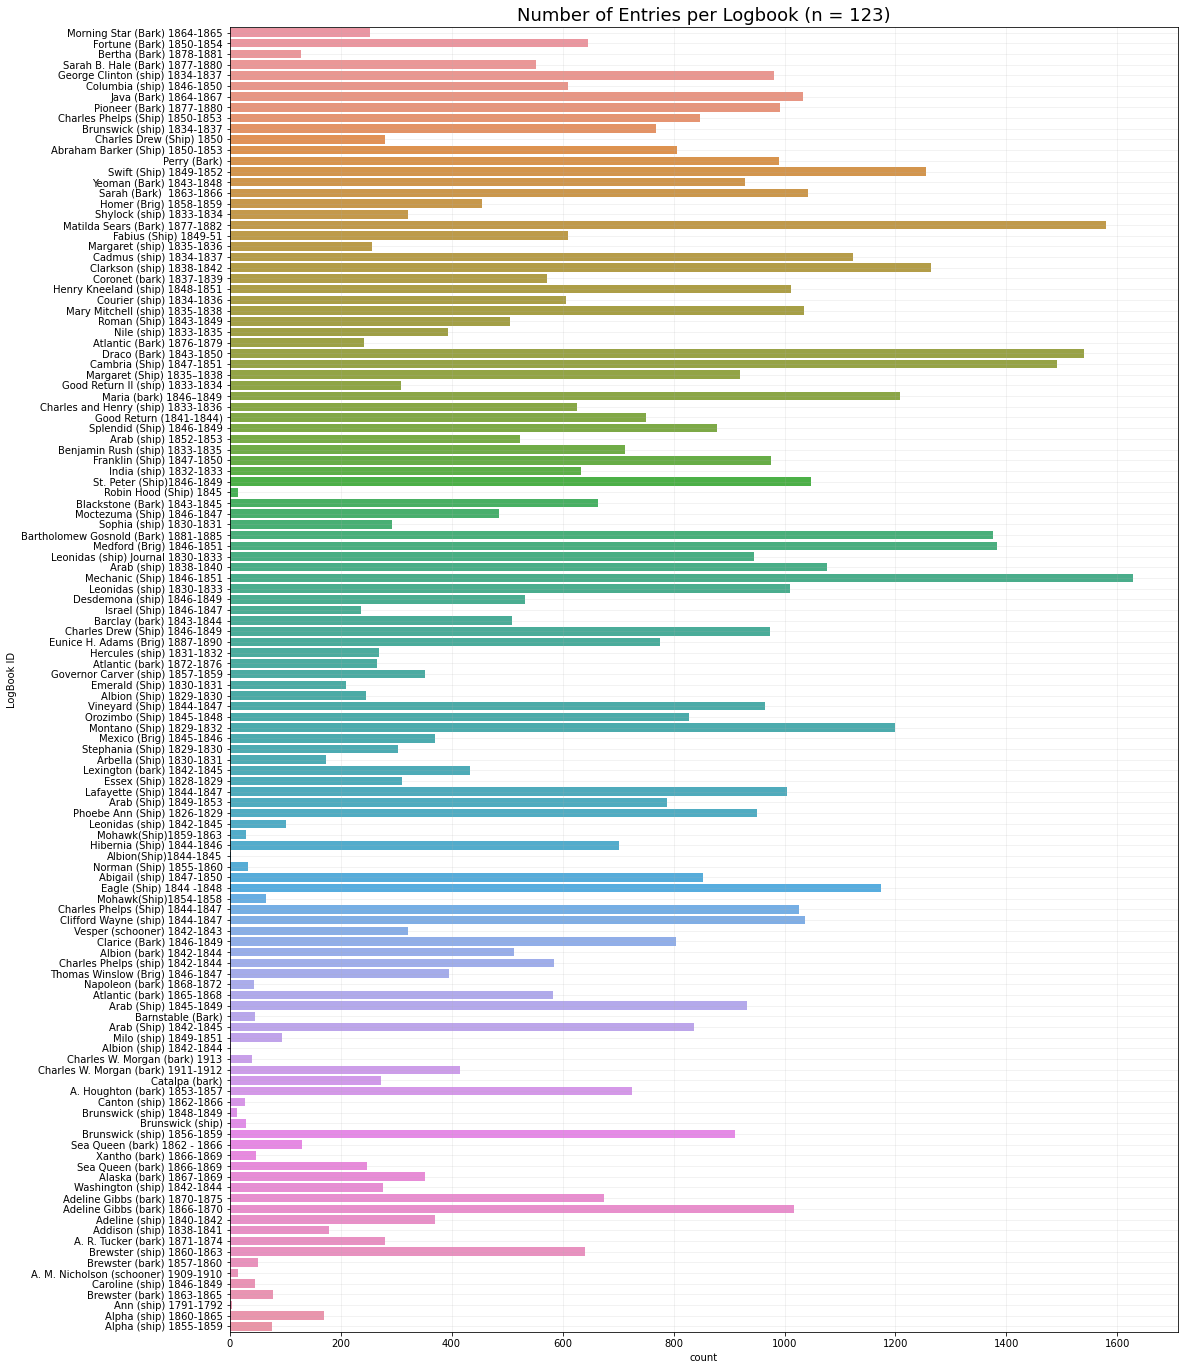

In [8]:
print('Unique Log Books: ',np.size(df["LogBook ID"].unique()))

f,ax = plt.subplots(figsize=(17,24))
sns.countplot(y=df["LogBook ID"])
ax.grid(alpha=0.2)
plt.title('Number of Entries per Logbook (n = 123)',fontsize=18)
plt.savefig('No. of Entries per Logbook_V6_Jun23.png',dpi=300,bbox_inches='tight')

Providence Public Library Logbooks

In [9]:
df["LogBook ID"].sort_values().unique()
ppl_logbook_ids = ["Clarice (Bark) 1846-1849","Abigail (ship) 1847-1850","Phoebe Ann (Ship) 1826-1829","Essex (Ship) 1828-1829",\
                  "Albion (Ship) 1829-1830","Montano (Ship) 1829-1832","Stephania (Ship) 1829-1830","Arbella (Ship) 1830-1831",\
                  "Emerald (Ship) 1830-1831","Leonidas (ship) 1830-1833","Hercules (ship) 1831-1832","Clifford Wayne (ship) 1844-1847",\
                  "Eagle (Ship) 1844 -1848","Hibernia (Ship) 1844-1846","Lafayette (Ship) 1844-1847","Vineyard (Ship) 1844-1847",\
                  "Mexico (Brig) 1845-1846","Orozimbo (Ship) 1845-1848","Charles Drew (Ship) 1846-1849","Israel (Ship) 1846-1847",\
                  "Mechanic (Ship) 1846-1851","Lexington (bark) 1842-1845","Leonidas (ship) 1842-1845","Vesper (schooner) 1842-1843",\
                  "Barclay (bark) 1843-1844","Blackstone (Bark) 1843-1845"]


#subsetting to PPL LogBook IDs
df_PPL = df[df["LogBook ID"].isin(ppl_logbook_ids)]

Unique Log Books from PPL:  26


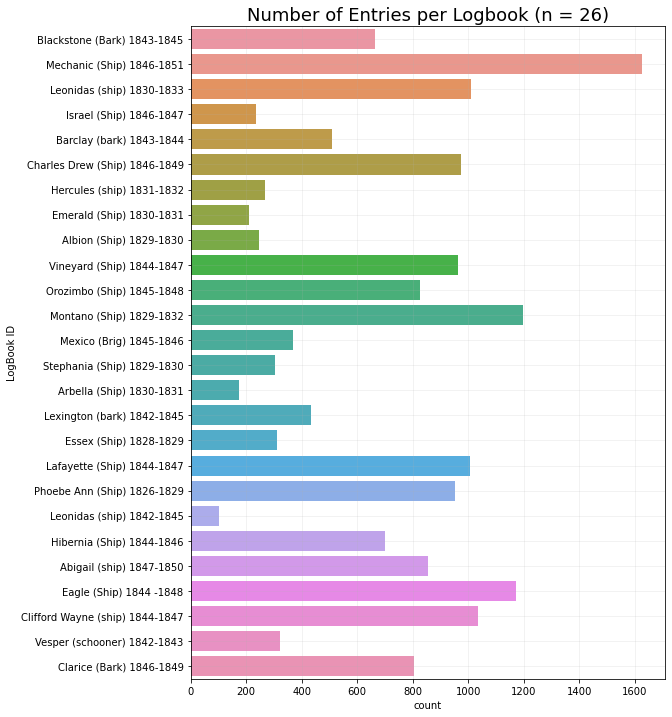

In [11]:
print('Unique Log Books from PPL: ',np.size(df_PPL["LogBook ID"].unique()))

f,ax = plt.subplots(figsize=(8.5,12))
sns.countplot(y=df_PPL["LogBook ID"])
ax.grid(alpha=0.2)
plt.title('Number of Entries per Logbook (n = 26)',fontsize=18)
plt.savefig('No. of Entries per Logbook_PPL_Jun23.png',dpi=300,bbox_inches='tight')

### Entries per Year

Number of years:  72
[1865. 1852. 1864. 1878. 1879. 1837. 1848. 1847. 1867. 1851. 1877. 1880.
 1836. 1866. 1850. 1835. 1853. 1834. 1846. 1859. 1833. 1858. 1882. 1881.
 1849. 1845. 1863. 1842. 1838. 1839. 1844.   nan 1843. 1841. 1832. 1831.
 1885. 1830. 1876. 1840. 1890. 1889. 1888. 1887. 1874. 1829. 1857. 1828.
 1873. 1827. 1855. 1826. 1854. 1872. 1868. 1860. 1913. 1912. 1911. 1884.
 1883. 1875. 1862. 1861. 1869. 1871. 1856. 1870. 1910. 1909. 1792. 1800.]

Empty DataFrame
Columns: [DateTime, ID, LogBook ID, Direction, Page, Latitude, Longitude, Depth, Depth Unit, Bottom, Landmark, Ship Heading/Course, Wind Direction, Wind Speed/Force, Sea State, Weather, Cloud Cover, Entry Date Time, coord_diff, usable, usable_latlon, usable_lat]
Index: []


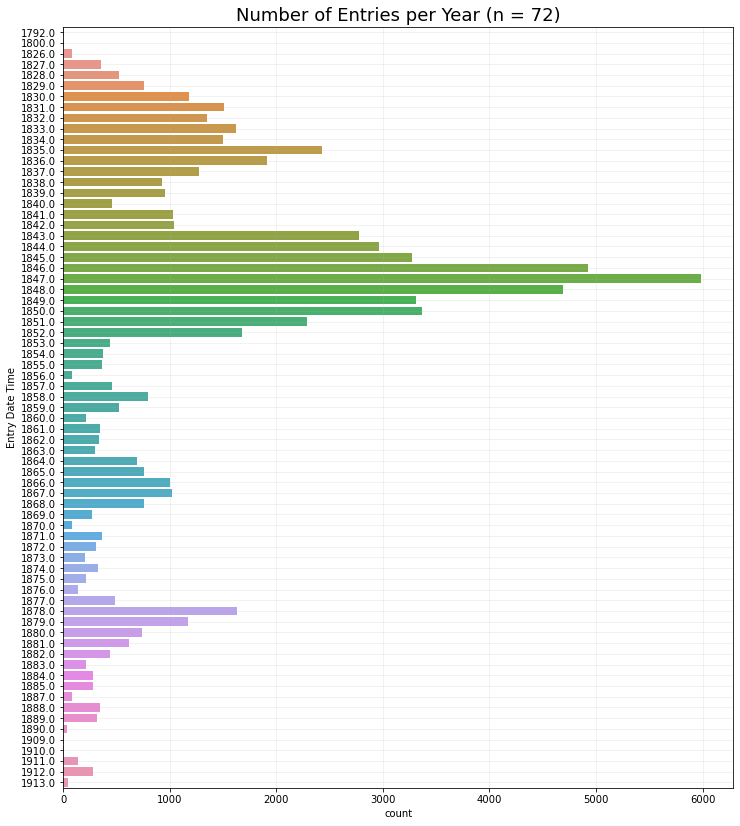

In [13]:
print('Number of years: ',np.size(df["Entry Date Time"].dt.year.unique()))
print(df["Entry Date Time"].dt.year.unique())
print()
print(df.loc[df["Entry Date Time"].dt.year==2021.])

f,ax = plt.subplots(figsize=(12,14))
sns.countplot(y=df["Entry Date Time"].dt.year)
ax.grid(alpha=0.2)
plt.title('Number of Entries per Year (n = 72)',fontsize=18)
plt.savefig('No. of Entries per Year_V6_Jun23.png',dpi=300,bbox_inches='tight')

### Geographic Focus on Azores/NA

In [14]:
# Filtering out all values in the North Atlantic. Coordinate Range is based on: https://marineregions.org/gazetteer.php?p=details&id=1912
df_NA = df_u[(df_u["Latitude"]>-0.936) & (df_u["Longitude"].between(-79.0,12.0059,inclusive=True))]
print(df_NA)

                  DateTime     ID               LogBook ID Direction  Page  \
30     1878-05-26 12:00:00  73651  Bertha (Bark) 1878-1881       NaN  39.0   
33     1878-05-25 12:00:00  73648  Bertha (Bark) 1878-1881       NaN  38.0   
35     1878-05-24 12:00:00  73646  Bertha (Bark) 1878-1881       NaN  38.0   
40     1878-05-22 12:00:00  73641  Bertha (Bark) 1878-1881       NaN  38.0   
49     1878-05-19 12:00:00  73632  Bertha (Bark) 1878-1881       NaN  37.0   
...                    ...    ...                      ...       ...   ...   
71549  1855-07-20 12:00:00    561   Alpha (ship) 1855-1859       NaN   6.0   
71550  1855-07-19 12:00:00    560   Alpha (ship) 1855-1859       NaN   6.0   
71552  1855-07-17 12:00:00    558   Alpha (ship) 1855-1859       NaN   6.0   
71553  1855-07-16 12:00:00    557   Alpha (ship) 1855-1859       NaN   6.0   
71556  1855-07-13 12:00:00    554   Alpha (ship) 1855-1859       NaN   5.0   

        Latitude  Longitude  Depth Depth Unit Bottom Landmark  

### Plotting Geographically Focussed Data (NA)

1800 :  (2, 22)
1826 :  (74, 22)
1828 :  (5, 22)
1829 :  (175, 22)
1830 :  (222, 22)
1831 :  (87, 22)
1832 :  (58, 22)
1833 :  (203, 22)
1834 :  (103, 22)
1835 :  (184, 22)
1836 :  (77, 22)
1837 :  (145, 22)
1838 :  (148, 22)
1839 :  (10, 22)
1840 :  (65, 22)
1841 :  (62, 22)
1842 :  (146, 22)
1843 :  (275, 22)
1844 :  (375, 22)
1845 :  (281, 22)
1846 :  (671, 22)
1847 :  (428, 22)
1848 :  (208, 22)
1849 :  (471, 22)
1850 :  (328, 22)
1851 :  (203, 22)
1852 :  (52, 22)
1853 :  (133, 22)
1854 :  (16, 22)
1855 :  (59, 22)
1856 :  (15, 22)
1857 :  (32, 22)
1858 :  (51, 22)
1859 :  (65, 22)
1860 :  (84, 22)
1862 :  (23, 22)
1863 :  (109, 22)
1864 :  (224, 22)
1865 :  (69, 22)
1866 :  (143, 22)
1867 :  (17, 22)
1868 :  (26, 22)
1869 :  (2, 22)
1870 :  (20, 22)
1871 :  (8, 22)
1872 :  (62, 22)
1874 :  (12, 22)
1875 :  (139, 22)
1876 :  (64, 22)
1877 :  (164, 22)
1878 :  (241, 22)
1879 :  (134, 22)
1880 :  (85, 22)
1881 :  (139, 22)
1885 :  (37, 22)
1887 :  (44, 22)
1888 :  (242, 22)
1889 :  

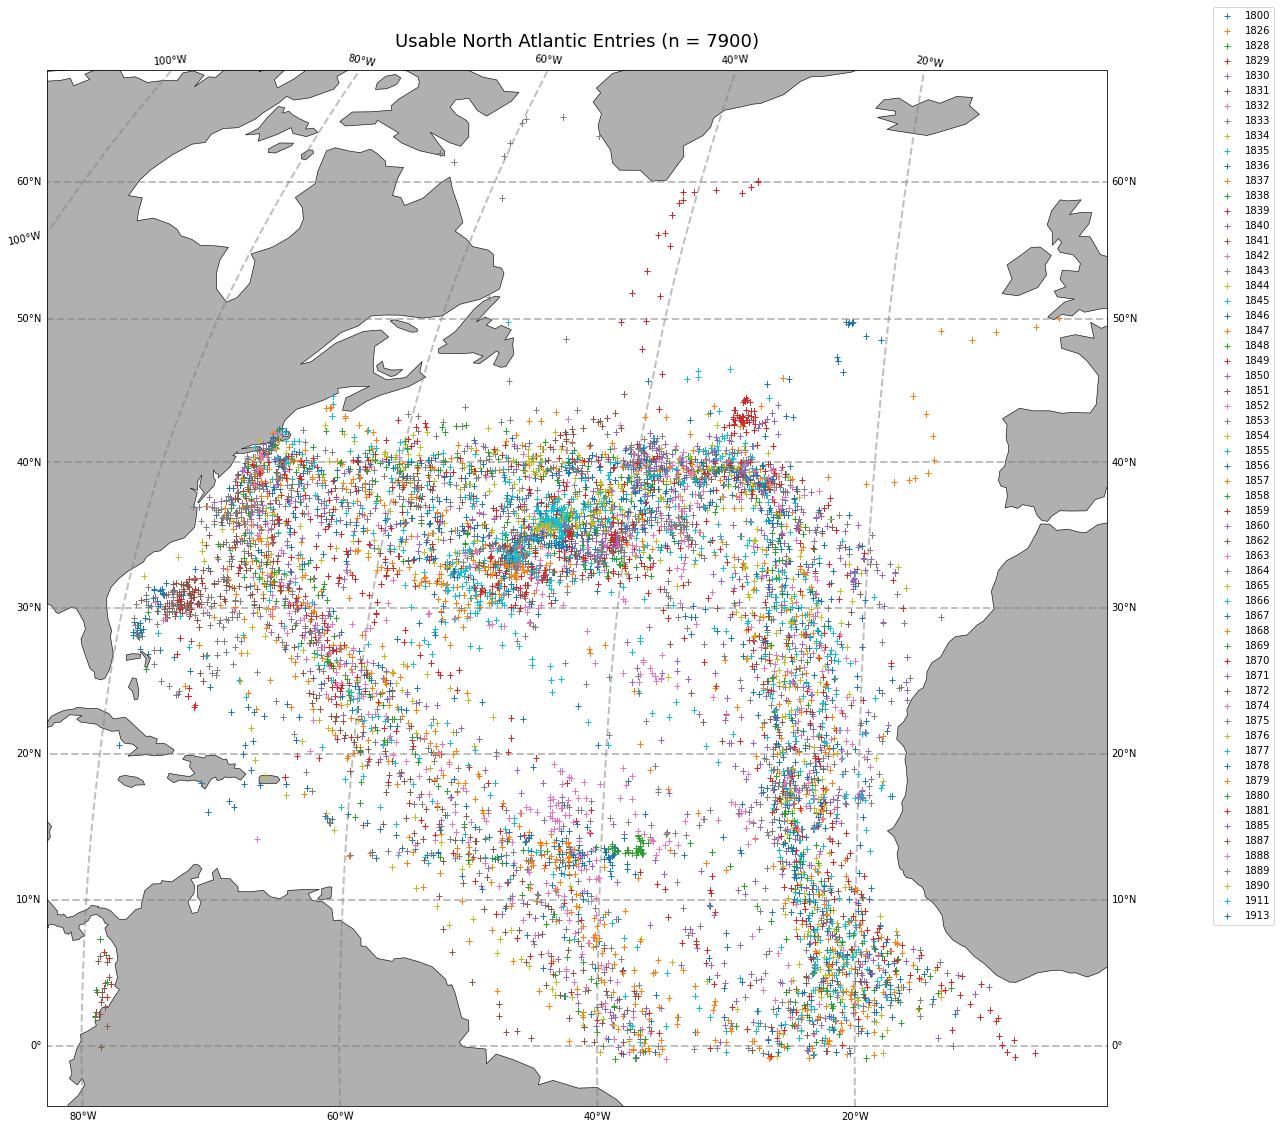

In [16]:
fig, ax = plt.subplots(figsize=(19,20),subplot_kw={'projection':ccrs.Robinson()})
#_ = ax.set_global()
_ = ax.coastlines(linewidth=0.5)
_ = ax.add_feature(cfeature.LAND, facecolor='#b0b0b0')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
for yr in sorted(df_NA['Entry Date Time'].dt.year.unique()):
    work = df_NA[df_NA['Entry Date Time'].dt.year == yr]
    _ = ax.plot(work.Longitude, work.Latitude, '+', transform=ccrs.PlateCarree(), label='{:.0f}'.format(yr))
    print(yr,': ',np.shape(work))

_ = ax.legend(loc=(1.1,0.175))
plt.title('Usable North Atlantic Entries (n = 7900)',fontsize=18)
fig.savefig('NA_Unique Years_V6_Jun23.png',dpi=300,bbox_inches='tight')

Number of years:  61
[1878 1864 1877 1880 1850 1853 1852 1834 1836 1879 1846 1866 1859 1851
 1833 1858 1881 1865 1837 1849 1845 1835 1863 1842 1838 1848 1843 1844
 1847 1841 1831 1885 1830 1876 1840 1890 1889 1888 1887 1832 1829 1857
 1828 1855 1826 1854 1872 1868 1913 1911 1875 1862 1869 1856 1867 1870
 1839 1874 1871 1860 1800]

Empty DataFrame
Columns: [DateTime, ID, LogBook ID, Direction, Page, Latitude, Longitude, Depth, Depth Unit, Bottom, Landmark, Ship Heading/Course, Wind Direction, Wind Speed/Force, Sea State, Weather, Cloud Cover, Entry Date Time, coord_diff, usable, usable_latlon, usable_lat]
Index: []


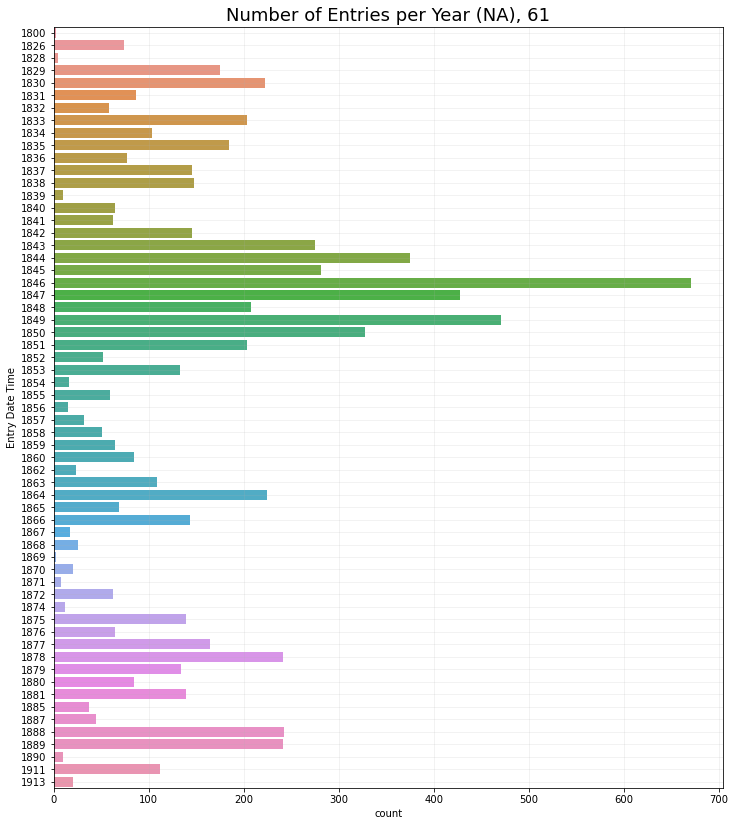

In [18]:
# Number of Entries per Year after Filtering NA values
print('Number of years: ',np.size(df_NA["Entry Date Time"].dt.year.unique()))
print(df_NA["Entry Date Time"].dt.year.unique())
print()
print(df_NA.loc[df_NA["Entry Date Time"].dt.year==2021.])

f,ax = plt.subplots(figsize=(12,14))
sns.countplot(y=df_NA["Entry Date Time"].dt.year)
ax.grid(alpha=0.2)
plt.title('Number of Entries per Year (NA), 61',fontsize=18)
plt.savefig('No. of Entries per Year_NA.png',dpi=200,bbox_inches='tight')

Unique Log Books:  112


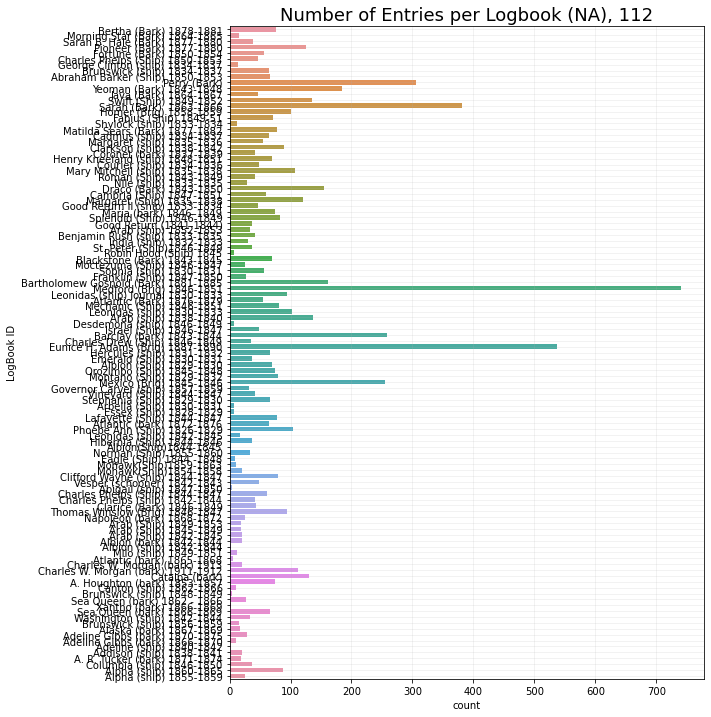

In [20]:
# Number of Entries per Logbook (NA)
print('Unique Log Books: ',np.size(df_NA["LogBook ID"].unique()))

f,ax = plt.subplots(figsize=(8.5,12))
sns.countplot(y=df_NA["LogBook ID"])
ax.grid(alpha=0.2)
plt.title('Number of Entries per Logbook (NA), 112',fontsize=18)
plt.savefig('No. of Entries per Logbook_NA.png',dpi=200,bbox_inches='tight')

### Year 1875: VEI5 level Eruption associated with Askja Caldera in Iceland

'Volta do Mar' navigational technique based on Portugal Current

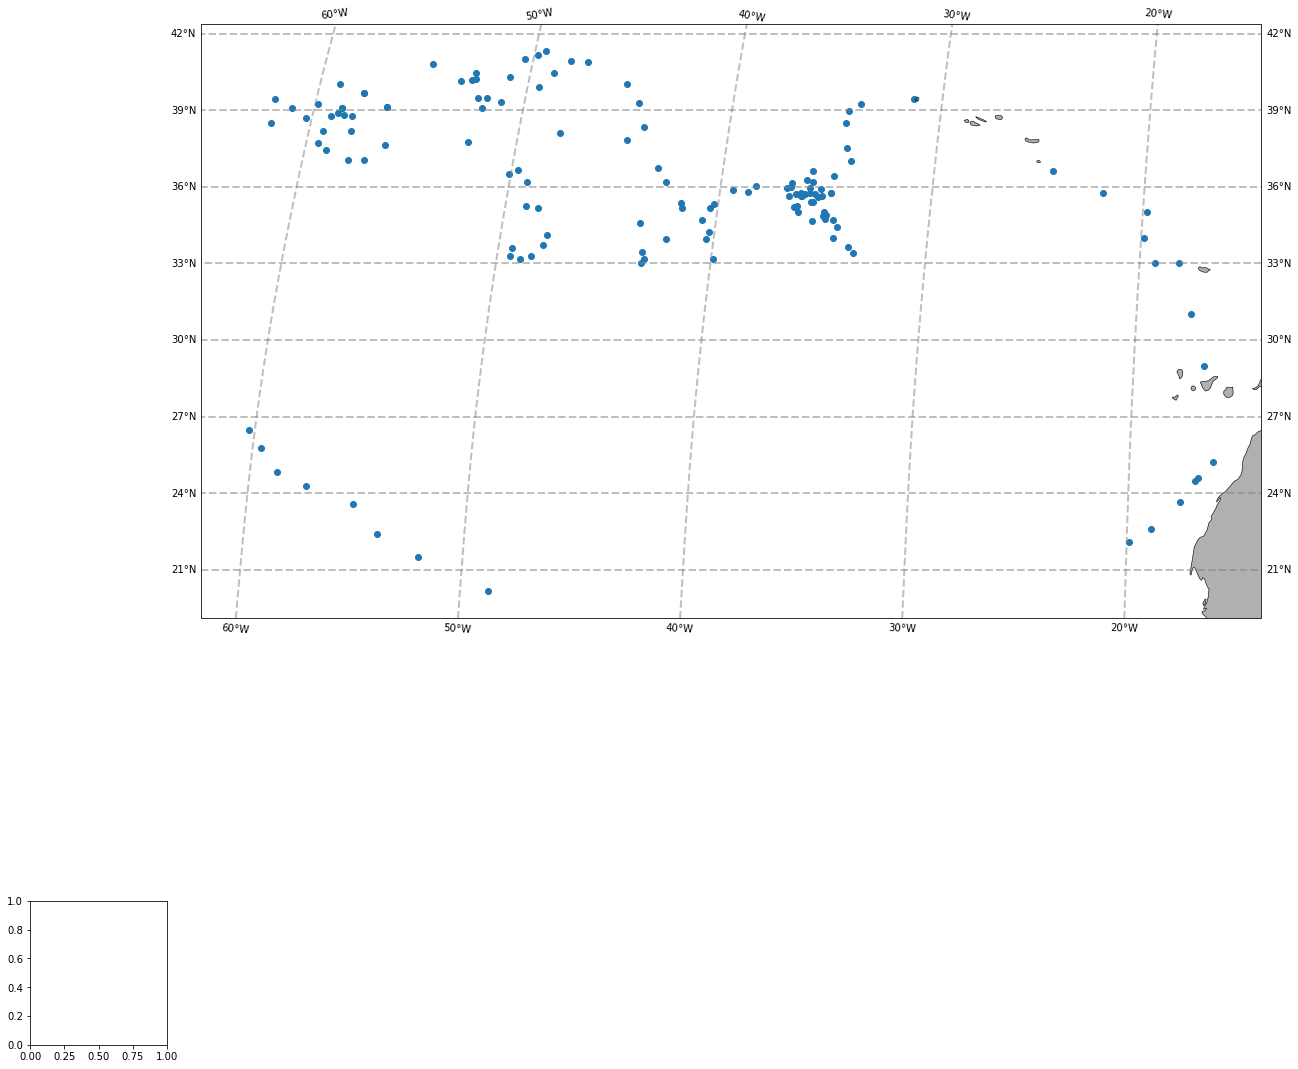

In [21]:
# Plotting 1875 data in the NA
year = 1875
work = df_NA[df_NA['Entry Date Time'].dt.year == year]
lon = work.Longitude
lat = work.Latitude
ws = work['Wind Speed/Force']

fig, ax = plt.subplots(figsize=(19,20),subplot_kw={'projection':ccrs.Robinson()})
#_ = ax.set_global()
#_ = ax.set_extent([-80, 0, 5, 60])
_ = ax.coastlines(linewidth=0.5)
_ = ax.add_feature(cfeature.LAND, facecolor='#b0b0b0')
#_ = ax.title('Logbook entries in the North Atlantic in 1875',fontsize=18)
cbar_ax = fig.add_axes([0, 0, 0.1, 0.1])

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

_ = ax.scatter(lon, lat, transform=ccrs.PlateCarree())
#_ = ax.colorbar()


#_ = ax.legend(loc=(1.1,-0.175))

fig.savefig('NA_1875_V3.png',dpi=200,bbox_inches='tight')

Number of NA entries in 1875:  (139, 22)



Text(0.5, 1.0, 'Number of Entries per Month in 1875')

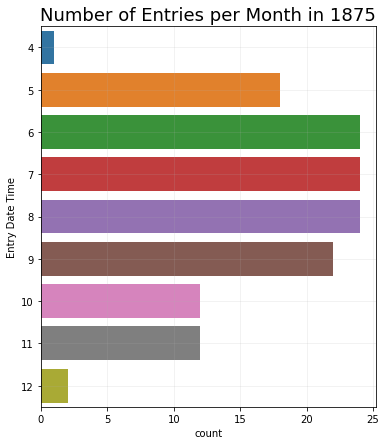

In [22]:
# Number of Entries per month in 1875
print('Number of NA entries in 1875: ',np.shape(df_NA[df_NA['Entry Date Time'].dt.year == 1875]))
#print(df_NA[df_NA["Entry Date Time"]==1875,'LogBook ID'].str.unique())
print()

df_NA_1875 = df_NA[df_NA['Entry Date Time'].dt.year == 1875]

f,ax = plt.subplots(figsize=(6,7))
sns.countplot(y=df_NA_1875["Entry Date Time"].dt.month)
ax.grid(alpha=0.2)
plt.title('Number of Entries per Month in 1875',fontsize=18)

Number of NA entries in 1874:  (12, 22)



Text(0.5, 1.0, 'Number of Entries per Month in 1874')

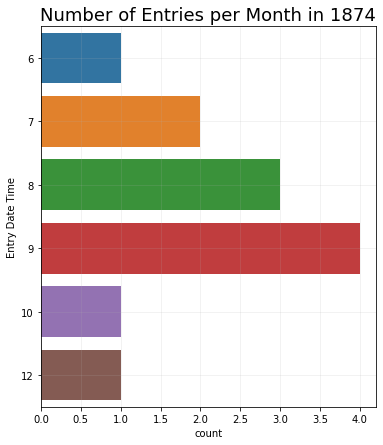

In [23]:
# Number of Entries per month in 1874
print('Number of NA entries in 1874: ',np.shape(df_NA[df_NA['Entry Date Time'].dt.year == 1874]))
#print(df_NA[df_NA["Entry Date Time"]==1874,'LogBook ID'].str.unique())
print()

df_NA_1874 = df_NA[df_NA['Entry Date Time'].dt.year == 1874]

f,ax = plt.subplots(figsize=(6,7))
sns.countplot(y=df_NA_1874["Entry Date Time"].dt.month)
ax.grid(alpha=0.2)
plt.title('Number of Entries per Month in 1874',fontsize=18)

### Average Daily Wind Speed

In [24]:
# Defining Range of Dates over which to iterate
from datetime import date, timedelta

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = np.min(df['Entry Date Time'])
end_date = np.max(df['Entry Date Time'])
end_date += datetime.timedelta(days=1)
dates = []
for single_date in daterange(start_date, end_date):
    dates.append(single_date)
print(np.size(dates))

44321


In [25]:
# Estimating Duplicate Data Entries per day (whole dataset)
counter = 0
for i in dates:
    cumsum=[]
    if np.size(df.loc[df["Entry Date Time"]==i,'Wind Speed/Force'])>1:
        cumsum = np.size(df.loc[df["Entry Date Time"]==i,'Wind Speed/Force'])
        counter += 1

#print(np.size(daily_ws))
print(counter,' out of ',np.size(df["Wind Speed/Force"]),' overall entries have multiple entries on the same day')

12452  out of  71581  overall entries have multiple entries on the same day


In [26]:
# Estimating Duplicate Data Entries per day (NA dataset)
counter = 0
for i in dates:
    cumsum=[]
    if np.size(df_NA.loc[df_NA["Entry Date Time"]==i,'Wind Speed/Force'])>1:
        cumsum = np.size(df_NA.loc[df_NA["Entry Date Time"]==i,'Wind Speed/Force'])
        counter += 1

#print(np.size(daily_ws))
print(counter,' out of ',np.size(df_NA["Wind Speed/Force"]),' NA entries have multiple entries on the same day')

1226  out of  7900  NA entries have multiple entries on the same day


### How many Entries are 'usable', i.e. exhibit Lat./Lon. and Wind Speed values?

In [27]:
df_NA['usable'] = (df_NA["Latitude"].notna() & df_NA["Longitude"].notna() & df_NA["Wind Speed/Force"].notna())
df_NA.loc[df_NA['usable']==True]

<ipython-input-27-50baaf9a6c60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NA['usable'] = (df_NA["Latitude"].notna() & df_NA["Longitude"].notna() & df_NA["Wind Speed/Force"].notna())


,DateTime,ID,LogBook ID,Direction,Page,Latitude,Longitude,Depth,Depth Unit,Bottom,Landmark,Ship Heading/Course,Wind Direction,Wind Speed/Force,Sea State,Weather,Cloud Cover,Entry Date Time,coord_diff,usable,usable_latlon,usable_lat
30,1878-05-26 12:00:00,73651,Bertha (Bark) 1878-1881,NaN,39.0,30.116667,-54.100000,NaN,NaN,NaN,NaN,N,W,4.5,NaN,NaN,NaN,1878-05-26 12:00:00,False,True,True,True
33,1878-05-25 12:00:00,73648,Bertha (Bark) 1878-1881,NaN,38.0,29.483333,-34.466667,NaN,NaN,NaN,NaN,N,W,4.5,NaN,NaN,NaN,1878-05-25 12:00:00,False,True,True,True
35,1878-05-24 12:00:00,73646,Bertha (Bark) 1878-1881,NaN,38.0,29.383333,-33.983333,NaN,NaN,NaN,NaN,W,SSW,2.0,calm,NaN,NaN,1878-05-24 12:00:00,False,True,True,True
40,1878-05-22 12:00:00,73641,Bertha (Bark) 1878-1881,NaN,38.0,29.950000,-32.916667,NaN,NaN,NaN,NaN,NaN,W to N,4.5,NaN,NaN,NaN,1878-05-22 12:00:00,False,True,True,True
49,1878-05-19 12:00:00,73632,Bertha (Bark) 1878-1881,NaN,37.0,29.750000,-54.233333,NaN,NaN,NaN,NaN,N by W,W,8.0,NaN,rain squalls,NaN,1878-05-19 12:00:00,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71549,1855-07-20 12:00:00,561,Alpha (ship) 1855-1859,NaN,6.0,39.816667,-54.116667,NaN,NaN,NaN,NaN,E SE,W,6.0,NaN,squally,NaN,1855-07-20 12:00:00,False,True,True,True
71550,1855-07-19 12:00:00,560,Alpha (ship) 1855-1859,NaN,6.0,40.116667,-59.100000,NaN,NaN,NaN,NaN,E by S,W SW,4.5,NaN,NaN,NaN,1855-07-19 12:00:00,False,True,True,True
71552,1855-07-17 12:00:00,558,Alpha (ship) 1855-1859,NaN,6.0,39.383333,-66.716667,NaN,NaN,NaN,NaN,E NE by the wind,SE,2.0,NaN,NaN,NaN,1855-07-17 12:00:00,False,True,True,True
71553,1855-07-16 12:00:00,557,Alpha (ship) 1855-1859,NaN,6.0,38.950000,-60.450000,NaN,Fathoms,NaN,NaN,S by the wind,E SE,2.0,NaN,NaN,NaN,1855-07-16 12:00:00,False,True,True,True
